### Import all Important Library 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *

### Import dataset

In [2]:
data = pd.read_csv('fake_job_postings.csv')
df = pd.DataFrame(data)  
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


### Checked data types of all columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Checked Null values in dataset

In [4]:
df.isnull().sum() / len(df)* 100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [5]:
df.drop(columns=['job_id','department', 'salary_range', 'benefits', 'required_experience', 'required_education', 'function'], inplace= True)

In [6]:
for i in df.columns:
    if df[i].dtype == 'O':  # for object (string/categorical) columns
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].median())


In [7]:
df.isnull().sum() / len(df)* 100

title               0.0
location            0.0
company_profile     0.0
description         0.0
requirements        0.0
telecommuting       0.0
has_company_logo    0.0
has_questions       0.0
employment_type     0.0
industry            0.0
fraudulent          0.0
dtype: float64

<Axes: xlabel='fraudulent', ylabel='count'>

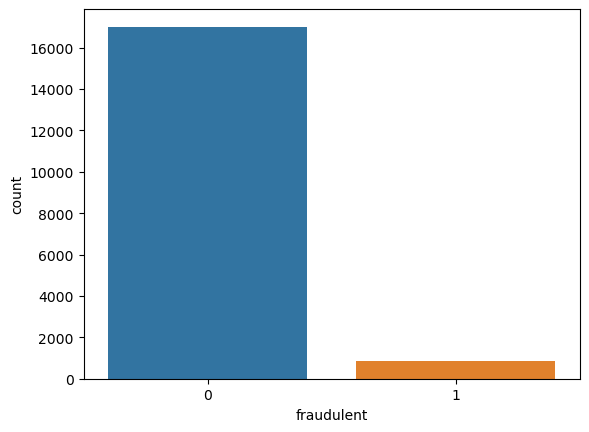

In [8]:
# plot a graph

sns.countplot(x='fraudulent', data = df)

In [9]:
LE = LabelEncoder()
SS = StandardScaler()

In [10]:
for i in df: 
    if df[i].dtype == 'object': 
        df[i] = LE.fit_transform(df[i])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   title             17880 non-null  int32
 1   location          17880 non-null  int32
 2   company_profile   17880 non-null  int32
 3   description       17880 non-null  int32
 4   requirements      17880 non-null  int32
 5   telecommuting     17880 non-null  int64
 6   has_company_logo  17880 non-null  int64
 7   has_questions     17880 non-null  int64
 8   employment_type   17880 non-null  int32
 9   industry          17880 non-null  int32
 10  fraudulent        17880 non-null  int64
dtypes: int32(7), int64(4)
memory usage: 1.0 MB


In [12]:
# divide dataset into dependent and independent variable

x = df.drop(columns='fraudulent')
y = df['fraudulent']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size = 0.2)

In [14]:
# Fit on training data and transform it
x_train = SS.fit_transform(x_train)

# Just transform test data using the same scaler
x_test = SS.transform(x_test)

In [15]:
LR = LogisticRegression()

In [16]:
LR.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = LR.predict(x_test)

In [18]:
Error = pd.DataFrame({'Actual Value': y_test, 'Predicated Value': y_pred})
Error

,Actual Value,Predicated Value
4708,0,0
11079,0,0
12357,0,0
14511,0,0
16691,0,0
...,...,...
10855,0,0
9827,0,0
4903,0,0
6723,0,0


In [19]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[3395    0]
 [ 181    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   title             17880 non-null  int32
 1   location          17880 non-null  int32
 2   company_profile   17880 non-null  int32
 3   description       17880 non-null  int32
 4   requirements      17880 non-null  int32
 5   telecommuting     17880 non-null  int64
 6   has_company_logo  17880 non-null  int64
 7   has_questions     17880 non-null  int64
 8   employment_type   17880 non-null  int32
 9   industry          17880 non-null  int32
 10  fraudulent        17880 non-null  int64
dtypes: int32(7), int64(4)
memory usage: 1.0 MB


In [21]:
! pip install imbalanced-learn scikit-learn

In [23]:
# balance dataset

from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE(random_state= 42)

In [26]:
x_resample, y_resample = smote.fit_resample(x_train, y_train)

In [28]:
LR.fit(x_resample, y_resample)

LogisticRegression()

In [29]:
new_y_pred = LR.predict(x_test)

In [31]:
new_y_pred = pd.DataFrame({'Actual Error': y_test, 'Predicated Error': new_y_pred})
new_y_pred

,Actual Error,Predicated Error
4708,0,0
11079,0,1
12357,0,0
14511,0,0
16691,0,0
...,...,...
10855,0,0
9827,0,0
4903,0,0
6723,0,0


In [32]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[3395    0]
 [ 181    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576

